In [1]:
import pandas as pd
import numpy as np
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

In [2]:
olist_customers_dataset = pd.read_csv('olist_customers_dataset.csv')
olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv')
olist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')

In [3]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])
olist_orders_dataset['order_approved_at'] = pd.to_datetime(olist_orders_dataset['order_approved_at'])
olist_orders_dataset['order_delivered_carrier_date'] = pd.to_datetime(olist_orders_dataset['order_delivered_carrier_date'])
olist_orders_dataset['order_delivered_customer_date'] = pd.to_datetime(olist_orders_dataset['order_delivered_customer_date'])
olist_orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(olist_orders_dataset['order_estimated_delivery_date'])
olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [6]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
olist_order_items_dataset[olist_order_items_dataset['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [8]:
olist_order_items_dataset['shipping_limit_date'] = pd.to_datetime(olist_order_items_dataset['shipping_limit_date'])
olist_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


# Задача 1. Оценить месячный retention в оформление заказа с помощью когортного анализа.

In [9]:
#Отфильтруем по статусу "Доставлено", и соединим две талблицы для получения customer_unique_id
delivered_orders = olist_orders_dataset.query('order_status=="delivered"')
delivered_orders = delivered_orders.merge(olist_customers_dataset[['customer_id', 'customer_unique_id']], how = 'left', on='customer_id')

In [10]:
# Создадим две новые колнки с типом "Период"
delivered_orders['order_period'] = delivered_orders['order_purchase_timestamp'].dt.to_period('M') 
delivered_orders['order_period_day'] = delivered_orders['order_purchase_timestamp'].dt.to_period('D')


In [11]:
# Создадим две колонки и найдем первые совершенные заказы
delivered_orders['cohort'] = delivered_orders.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
delivered_orders['cohort_day'] = delivered_orders.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')


In [12]:
# Посчитаем сколько по полным месяцам нахождение пользователя в периоде
delivered_orders['period_number_month'] = np.floor((delivered_orders.order_period_day - delivered_orders.cohort_day).apply(attrgetter('n')) / 30)


In [13]:
# Сгруппируем по когорте и периоду
df_cohort = delivered_orders.groupby(['cohort', 'period_number_month']).agg(n_customers=('customer_unique_id', 'nunique')).reset_index()

In [14]:
#Выведем таблицу по когортам
df_pivot = df_cohort.pivot_table(index='cohort', columns='period_number_month', values = 'n_customers')

In [15]:
# Подготовим данные для тепловой карты
cohort_size = df_pivot.iloc[:, 0]
retention_matrix = df_pivot.divide(cohort_size, axis = 0)

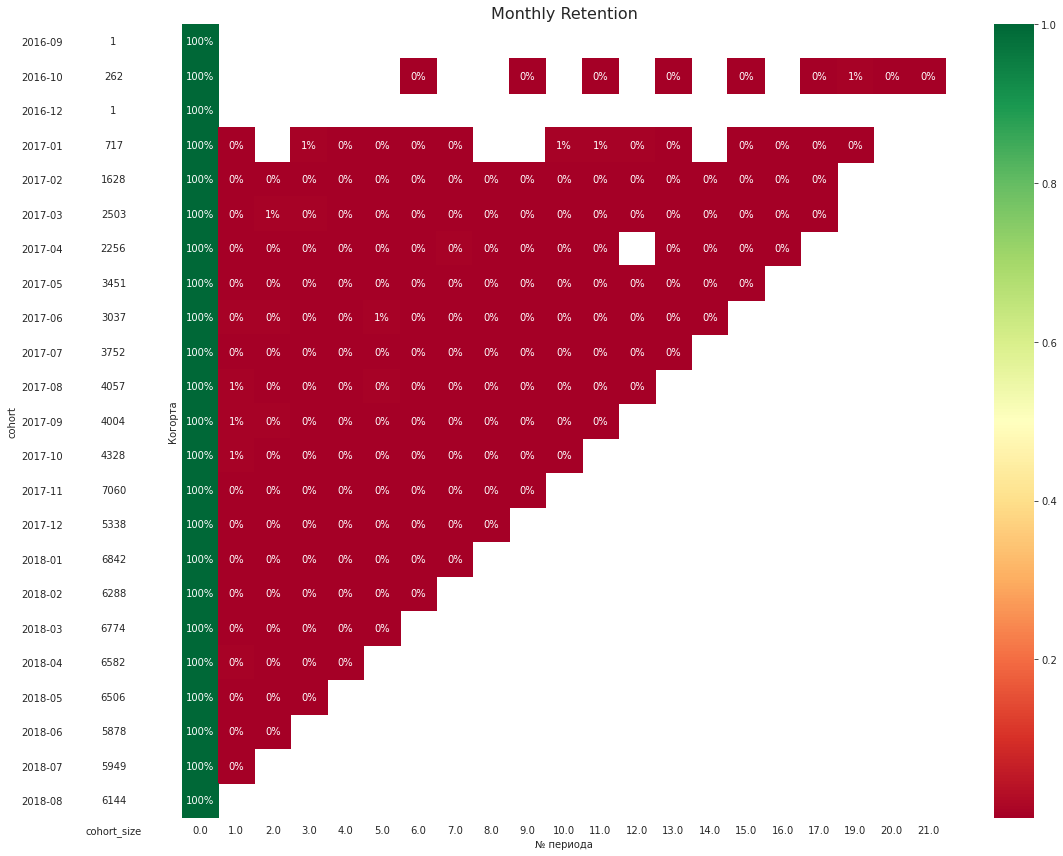

In [16]:
# Выведем тепловую карту
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16,12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
               annot=True,
               fmt='.0%',
               cmap='RdYlGn',
               ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')
    
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
               annot=True,
               cbar=False,
               fmt='g',
               cmap=white_cmap,
               ax=ax[0])
    
    fig.tight_layout()
    plt.show()

In [17]:
print(f'Медианный retention 1-го месяца равен {retention_matrix[1.0].median()}.')

Медианный retention 1-го месяца равен 0.0035460992907801418.


In [18]:
cohort_m = retention_matrix[retention_matrix[3] == retention_matrix[3].max()].index.tolist()
max_ret = retention_matrix[3].max()
print(f'Когортой с самым высоким retention на 3-й месяц является {str(cohort_m)[9:16]}, retention равен {max_ret.round(4)}.')

Когортой с самым высоким retention на 3-й месяц является 2017-01, retention равен 0.0056.


# Задача 2. Определить, существует ли product/market fit у маркетплейса.

Если смотреть на ретеншн в количестве людей, то мы видим что продукт/маркетфит отсутствует из-за околонулевой возвращаемости клиентов, но в тоже время у нас хорошо работает привлекаемость клиентов, кроме последних периодов, так как мы видим увеличение в нулевой период из когорты в когорту. Но даже в последние пол года, клиенты, в среднем, держатся на одном уровне

Вывод: нужно сконцентрироваться на удержании клиентов в продукте.

In [19]:
df_pivot.fillna(0)

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10,262.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0
2016-12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01,717.0,2.0,0.0,4.0,1.0,1.0,2.0,2.0,0.0,0.0,...,4.0,3.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,0.0,0.0,0.0
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,0.0,0.0,0.0
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


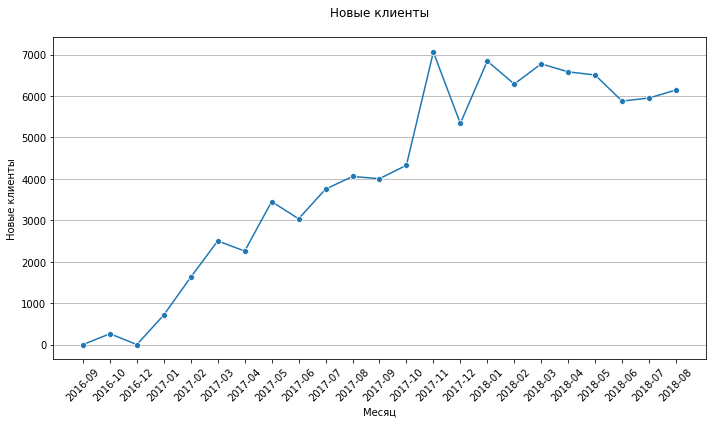

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=cohort_size.reset_index()['cohort'].astype('str'), y=0.0, data=cohort_size.reset_index(), marker='o')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.title('Новые клиенты\n')
plt.xlabel('Месяц')
plt.ylabel('Новые клиенты')
plt.tight_layout()
plt.show()

# Задача 3. Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.

In [21]:
delivered_orders_merge = delivered_orders.merge(olist_order_items_dataset, how='left', on='order_id')

In [22]:
delivered_orders_items = delivered_orders_merge[['order_id','customer_id', 'customer_unique_id', 'product_id', 'seller_id', 'order_period','cohort','period_number_month','order_purchase_timestamp', 'shipping_limit_date', 'price', 'freight_value' ]]

Первая метрика должна отражать общий объем продаж маркетплейса. GMV

С GMV, в принципе, всё в порядке. Видим стагнирование в последние 3 месяца, но на общей картине GMV растет. 
Это обусловлено тем, что мы отлично привлекаем клиентов. Но не удерживаем...

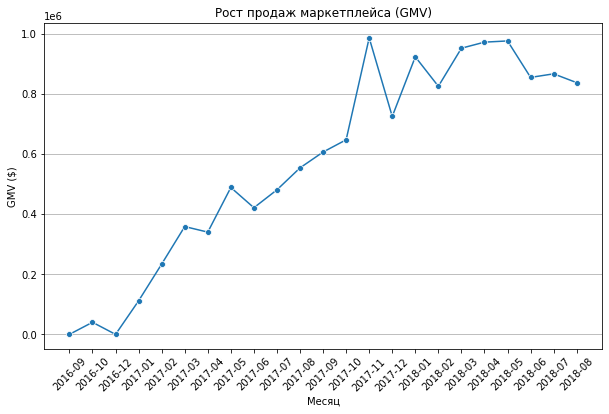

In [23]:
revenue = delivered_orders_items.groupby(['order_period'], as_index=False).sum()[['order_period','price']]
revenue['order_period'] = revenue['order_period'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue, x='order_period', y='price', marker='o')
plt.title('Рост продаж маркетплейса (GMV)')
plt.xlabel('Месяц')
plt.ylabel('GMV ($)')
plt.grid(axis='y')
plt.xticks(rotation=45)

plt.show()

Вторая — показывать объем аудитории, которой продукт доставляет ценность.

Кол-во уникальных клиентов на графике:

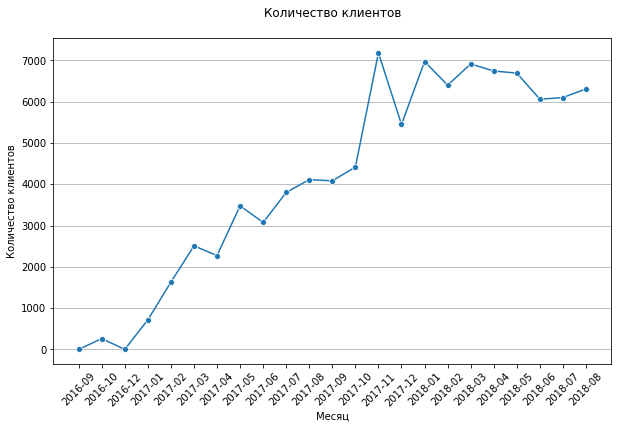

In [24]:
customers = delivered_orders_items.groupby(['order_period'], as_index=False).nunique()[['order_period','customer_unique_id']]
customers['order_period'] = customers['order_period'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(x='order_period', y='customer_unique_id', data=customers, marker='o')
plt.title('Количество клиентов\n')
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

За счет увеличения клиентов, увеличивается кол-во заказов, что в принципе логично

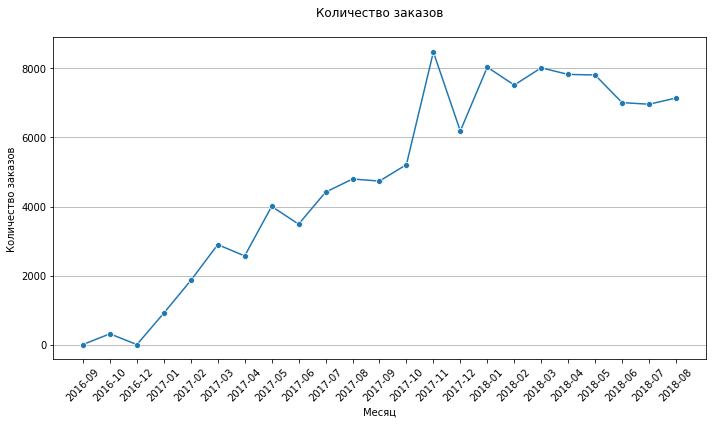

In [25]:
orders = delivered_orders_items.groupby(['order_period'], as_index=False).count()[['order_period','order_id']]
orders['order_period'] = orders['order_period'].astype('str')

plt.figure(figsize=(10, 6))
sns.lineplot(x='order_period', y='order_id', data=orders, marker='o')
plt.title('Количество заказов\n')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Третья — отражать заинтересованность новых клиентов в продакте.

Возвращаемся к retention, заинтересованность есть.

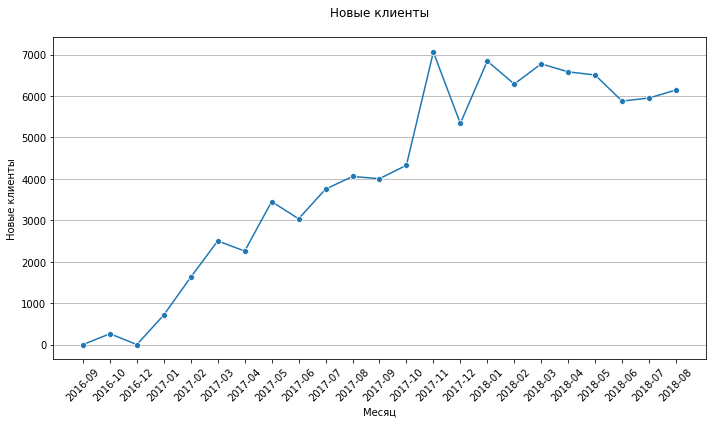

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=cohort_size.reset_index()['cohort'].astype('str'), y=0.0, data=cohort_size.reset_index(), marker='o')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.title('Новые клиенты\n')
plt.xlabel('Месяц')
plt.ylabel('Новые клиенты')
plt.tight_layout()
plt.show()

Четвёртая — отражать вовлеченность клиента в продолжение использования продукта.

Видим что продолжают делать 2 и более заказа только 3% пользователей. Вовлеченности нет

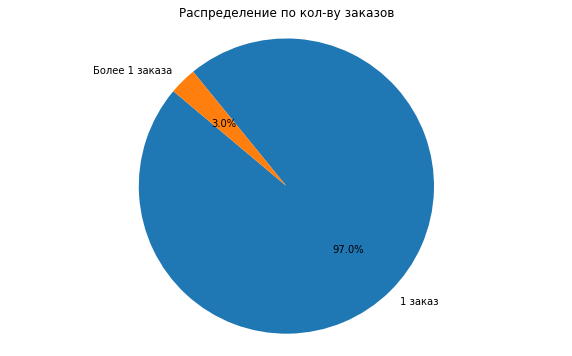

In [27]:
one_order = delivered_orders_items.groupby('customer_unique_id').nunique().query('order_id==1').shape[0]
more_orders = delivered_orders_items.groupby('customer_unique_id').nunique().query('order_id>1').shape[0]

sizes = [one_order, more_orders]
labels = ['1 заказ', 'Более 1 заказа']
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Распределение по кол-ву заказов')
plt.axis('equal')  # Убедитесь, что круговая диаграмма будет кругом
plt.show()

Пятая — отражать денежное выражение вовлеченности клиента.

Можно сказать что ARPPU у нас стагнирует, что говорит нам о том что клиенты заказывают примерно на одну и ту же стоимость в каждом периоде. Вывод - денежное выражение у нас стабильное.

In [28]:
merge_data = customers.merge(orders).merge(revenue)
merge_data['ARPPU'] = merge_data['price']/merge_data['customer_unique_id']


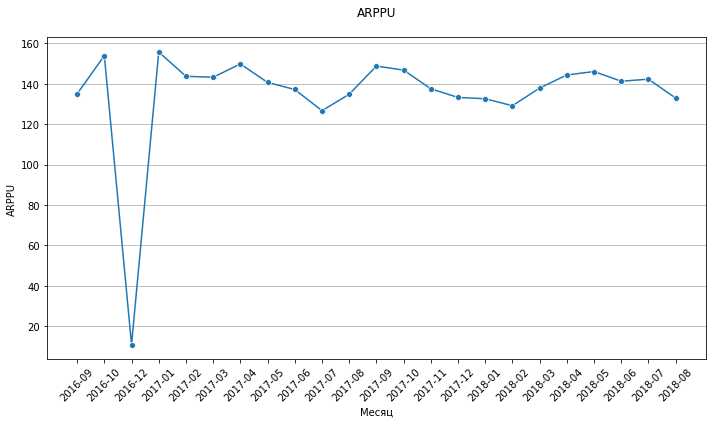

In [29]:
merge_data['order_period'] = merge_data['order_period'].astype('str')

plt.figure(figsize=(10, 6))
sns.lineplot(x='order_period', y='ARPPU', data=merge_data, marker='o')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.title('ARPPU\n')
plt.xlabel('Месяц')
plt.ylabel('ARPPU')
plt.tight_layout()
plt.show()

Так как у нас retention около нулевой, то LTV такой же как ARPPU. 

За одно узнаем среднюю продолжительность отношений с клиентом, которая составит 2.6 дня.
Это как раз те кто входит в 3% повторных заказов. И в основном остаются в изначальной когорте.

In [30]:
customer_lifetime  = delivered_orders_items.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].agg(['min', 'max']).reset_index()
customer_lifetime.columns = ['customer_id', 'first_purchase', 'last_purchase']

In [31]:
customer_lifetime['lifetime_days'] = (customer_lifetime['last_purchase'] - customer_lifetime['first_purchase']).dt.days
average_lifetime = customer_lifetime['lifetime_days'].mean()
print(f'Средняя продолжительность отношений с клиентом: {average_lifetime} дней')

Средняя продолжительность отношений с клиентом: 2.6340324342852246 дней


In [93]:
merge_data['LTV'] = merge_data['ARPPU'] * average_lifetime

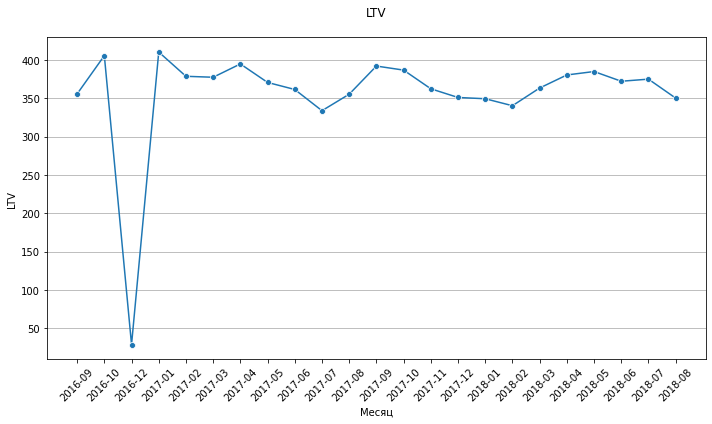

In [94]:
merge_data['order_period'] = merge_data['order_period'].astype('str')

plt.figure(figsize=(10, 6))
sns.lineplot(x='order_period', y='LTV', data=merge_data, marker='o')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.title('LTV\n')
plt.xlabel('Месяц')
plt.ylabel('LTV')
plt.tight_layout()
plt.show()

# Задача 4. Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.

In [34]:
orders_price = olist_order_items_dataset.groupby('order_id' ,as_index=False).sum()[['order_id', 'price']]

In [35]:
#Соеденим несколько таблиц, и посмотрим в каких статусах находятся заказы. Данные берем с Июня 2017

olist_orders_dataset['order_period'] = olist_orders_dataset['order_purchase_timestamp'].dt.to_period('M') 
from_June = olist_orders_dataset.query('order_period >= "2017-06"')
from_June = from_June.merge(olist_customers_dataset[['customer_id', 'customer_unique_id']], how = 'left', on='customer_id')
from_June = from_June.merge(orders_price[['order_id','price']], how = 'left', on='order_id')

from_June.order_status.value_counts()

delivered      85413
shipped          912
canceled         499
unavailable      475
invoiced         240
processing       202
created            5
Name: order_status, dtype: int64

In [36]:
from_June.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87746 entries, 0 to 87745
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       87746 non-null  object        
 1   customer_id                    87746 non-null  object        
 2   order_status                   87746 non-null  object        
 3   order_purchase_timestamp       87746 non-null  datetime64[ns]
 4   order_approved_at              87624 non-null  datetime64[ns]
 5   order_delivered_carrier_date   86394 non-null  datetime64[ns]
 6   order_delivered_customer_date  85407 non-null  datetime64[ns]
 7   order_estimated_delivery_date  87746 non-null  datetime64[ns]
 8   order_period                   87746 non-null  period[M]     
 9   customer_unique_id             87746 non-null  object        
 10  price                          87140 non-null  float64       
dtypes: datetime64[n

In [37]:
confidence1 = 8
ease1 = 6
confidence2 = 10
ease2 = 4
confidence3 = 5
ease3 = 9

In [38]:
# Напишем функцию для перевода импакта в шкалу от 1 до 10
def impact(x):
    ranges = [(0, 50, 1),
             (51, 150, 2),
             (151, 350, 3),
             (351, 750, 4),
             (751, 1550, 5),
             (1551, 3150, 6),
             (3151, 6350, 7),
             (6351, 12750, 8),
             (12751, 25550, 9),
             (25551, 51150, 10)] 
    for lower, upper, impact in ranges:
        if lower <= x <= upper:
            return impact

# **Гипотеза 1.**

Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

In [39]:
median_conv = retention_matrix[1.0].median()

In [40]:
from_June.order_status.value_counts()

delivered      85413
shipped          912
canceled         499
unavailable      475
invoiced         240
processing       202
created            5
Name: order_status, dtype: int64

In [41]:
cancel_user_order_counts = from_June.query('order_status == "canceled"').groupby('customer_unique_id').size().reset_index(name='cancels')
conversion_data_g1 = cancel_user_order_counts.groupby('cancels').size().reset_index(name='user_count')
conversion_data_g1['total_cancels'] = conversion_data_g1['cancels']*conversion_data_g1['user_count']
conversion_data_g1

,cancels,user_count,total_cancels
0,1,482,482
1,2,7,14
2,3,1,3


In [42]:
conversion_data_g1.sum()

cancels            6
user_count       490
total_cancels    499
dtype: int64

In [43]:
print(f'{conversion_data_g1.sum().user_count} пользователей - это кто столкнулся с отменой, также у некоторых пользователей было несколько отмен, но будем считать это как одну отмену. Работаем с {conversion_data_g1.sum().user_count} пользователями/отменами.')

490 пользователей - это кто столкнулся с отменой, также у некоторых пользователей было несколько отмен, но будем считать это как одну отмену. Работаем с 490 пользователями/отменами.


In [44]:
unique_cancel_orders = from_June.query('order_status == "canceled"')['customer_unique_id'].unique()
life_cicle = from_June.query('customer_unique_id in @unique_cancel_orders')
life_cicle_only_cancel = life_cicle.query('order_status !="canceled" ')['customer_unique_id'].unique()
len(life_cicle_only_cancel)

71

In [96]:
print(f'Среди {conversion_data_g1.sum().user_count} всех пользователей есть {len(life_cicle_only_cancel)} человек который имеет жизненный цикл в нашем продукте.')

Среди 490 всех пользователей есть 71 человек который имеет жизненный цикл в нашем продукте.


Т.е. они уже совершали заказы до отмены либо после, что говорит нам о том что он уже влиял на наши метрики. И зная нашу конверсию в повторный заказ, а в данном случае отмена - это уже как минимум второй заказ, при конвертации их из отмены в доставленный заказ, мы не можем надеятся на то, что человек после этого совершит ещё один заказ. Они просто увеличат нам кол-во заказов, и врятли придут ещё.

Что не скажешь про тех кто столкнулся с отменой и больше не связывался с нашим продуктом. При конвертации в доставленные, люди только начнут жизненный цикл нашем продукте, и как раз у них появляется конверсия в повторный заказ

Математика для определения на сколько увеличатся доставленные заказы следующая:
Общее количество уникальных пользователей + пользователи у кого была только отмена * медианную конверсию

In [47]:
conclusion_1 = round(conversion_data_g1.sum().user_count + (conversion_data_g1.sum().user_count-len(life_cicle_only_cancel)) * median_conv)
conclusion_1

491

In [48]:
ice1 = impact(conclusion_1) * confidence1 * ease1 
print(f'Импакт первой гипотезы равен {impact(conclusion_1)}, ICE {ice1}')

Импакт первой гипотезы равен 4, ICE 192


Вывод: Если мы избавимся от всех отмен, то мы можем сгенерировать 491 дополнительный заказ. Который в большую степень повлияет на выручку и кол-во заказов.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------

# **Гипотеза 2**

Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.

Время опоздания заказа (delay) = фактическое время доставки - ожидаемое время доставки

Время передачи в отгрузку (transfer_time) будем считать от созданного заказа до времени когда передали в отгрузку, так как маркетплейсы работают и с предоплатой и с постоплатой.

Время влияния передачи в отгрузку (delivery_impact) будем считать как Время опоздания заказа - Время передачи в отгрузку

In [49]:
from_June['delivery_time'] = (from_June['order_delivered_customer_date'] - from_June['order_purchase_timestamp']).dt.days
from_June['delay'] = (from_June['order_delivered_customer_date'] - from_June['order_estimated_delivery_date']).dt.days
from_June['transfer_time'] = (from_June['order_delivered_carrier_date'] - from_June['order_purchase_timestamp']).dt.days
from_June['delivery_impact'] = from_June['delay'] - from_June['transfer_time']

In [50]:
late_delivery = from_June.query('order_status == "delivered" and delay > 0')

Если посмотреть на описательную статистику, которые опоздали, то можно сделать **предварительный вывод по медианам**, что не такое уж и долгое у нас время на сборку заказа, всего 3 дня, а заказы всё ровно задерживаются на 7 дней. Реальная причина задержки заказа может скрыватся где-то в другом месте.

delay - заказы задерживаются на 7 дней

transfer_time - 3 дня нужно на сборку заказа

delivery_impact - при сборке заказа за 3 дня, по медиане, есть ещё 3 свободных дня до плановой доставки, но заказ уже доставлен.

In [51]:
late_delivery.describe()

,price,delivery_time,delay,transfer_time,delivery_impact
count,6087.000000,6087.000000,6087.000000,6086.000000,6086.000000
mean,150.686865,32.791851,10.141449,5.440355,4.701775
std,230.689042,15.267401,12.355076,7.232560,13.666420
min,3.540000,3.000000,1.000000,-1.000000,-37.000000
25%,49.900000,24.000000,3.000000,1.000000,-2.000000
50%,91.000000,31.000000,7.000000,3.000000,3.000000
75%,159.985000,39.000000,13.000000,6.000000,9.000000
max,6729.000000,208.000000,188.000000,125.000000,185.000000


In [52]:
count_late_delivery = late_delivery.shape[0]
print(f'Общее количество опоздавших заказов: {count_late_delivery}')

Общее количество опоздавших заказов: 6087


-----------------------------------------------------------------------------------------------------------

Посмотрим у кого передача в отгрузку отразилась на доставке, и заказ получили не во время

In [53]:
bad_impact = late_delivery.query('delivery_impact < 0')
unique_customer_bad_impact = bad_impact['customer_unique_id'].nunique()

print(f'Доля заказов у которых передача в доставку повлияла на конечную доставку - {round((bad_impact.shape[0] / count_late_delivery)*100)}% от всех опоздавших')

Доля заказов у которых передача в доставку повлияла на конечную доставку - 31% от всех опоздавших


In [54]:
bad_impact_user_counts = bad_impact.groupby('customer_unique_id').size().reset_index(name='order_count')
bad_impact_conversion_data = bad_impact_user_counts.groupby('order_count').size().reset_index(name='user_count')
bad_impact_conversion_data['conversion_rate'] = bad_impact_conversion_data['user_count'] / unique_customer_bad_impact
bad_impact_conversion_data['orders_sum'] = bad_impact_conversion_data['order_count'] * bad_impact_conversion_data['user_count']
bad_impact_conversion_data

,order_count,user_count,conversion_rate,orders_sum
0,1,1855,0.998923,1855
1,2,2,0.001077,4


In [55]:
bad_impact_conversion_data.sum()

order_count           3.0
user_count         1857.0
conversion_rate       1.0
orders_sum         1859.0
dtype: float64

In [56]:
print(f'{bad_impact_conversion_data.sum().orders_sum} заказов которые могли придти во время, если бы сократили время до отгрузки, и из них только у {bad_impact_conversion_data.user_count[1]} пользователей был повторный заказ после задержки с доставкой, и им снова задержанный.')
print(f'Конверсия в повторный заказ составила - {round(bad_impact_conversion_data.conversion_rate[1],4)}')

1859.0 заказов которые могли придти во время, если бы сократили время до отгрузки, и из них только у 2 пользователей был повторный заказ после задержки с доставкой, и им снова задержанный.
Конверсия в повторный заказ составила - 0.0011


И посмотрим на их описательную статистику 

delay - заказы задерживаются на 3 дня

transfer_time - 8 дней потребовалось на сборку заказа

delivery_impact - если заказы собирали бы быстрее на 4 дня, то медианный заказ мог придти бы во время. 

In [57]:
bad_impact.describe()

,price,delivery_time,delay,transfer_time,delivery_impact
count,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000
mean,172.014443,26.431415,4.754169,11.351264,-6.597095
std,292.582984,11.306095,6.222578,9.886319,5.946805
min,4.200000,3.000000,1.000000,2.000000,-37.000000
25%,50.000000,20.000000,1.000000,5.000000,-10.000000
50%,98.000000,26.000000,3.000000,8.000000,-4.000000
75%,176.950000,32.000000,6.000000,15.000000,-2.000000
max,6729.000000,126.000000,100.000000,125.000000,-1.000000


-------------------------------------------------------------------------

Теперь, для сравнения, посмотрим на конверсию у кого передача в отгрузку не отразилась на доставку, но заказ **всё ровно получили не во время**, и посмотрим на конверсию.

In [58]:
good_impact = late_delivery.query('delivery_impact >= 0')
unique_customer_good_impact = good_impact['customer_unique_id'].nunique()

print(f'Доля заказов у которых передача в доставку НЕ повлияла на конечную доставку - {round((good_impact.shape[0] / count_late_delivery)*100)}% от всех опоздавших')

Доля заказов у которых передача в доставку НЕ повлияла на конечную доставку - 69% от всех опоздавших


In [59]:
good_impact_user_counts = good_impact.groupby('customer_unique_id').size().reset_index(name='order_count')
good_impact_conversion_data = good_impact_user_counts.groupby('order_count').size().reset_index(name='user_count')
good_impact_conversion_data['conversion_rate'] = good_impact_conversion_data['user_count'] / unique_customer_good_impact
good_impact_conversion_data['orders_sum'] = good_impact_conversion_data['order_count'] * good_impact_conversion_data['user_count']
good_impact_conversion_data

,order_count,user_count,conversion_rate,orders_sum
0,1,4187,0.995246,4187
1,2,20,0.004754,40


In [60]:
good_impact_conversion_data.sum()

order_count           3.0
user_count         4207.0
conversion_rate       1.0
orders_sum         4227.0
dtype: float64

In [61]:
print(f'{good_impact_conversion_data.sum().orders_sum} заказов которые могли придти во время, но при этом передача в доставку была быстрой, и из них только у {good_impact_conversion_data.user_count[1]} пользователей был повторный заказ после задержки с доставкой, и также задержанный.')
print(f'Конверсия в повторный заказ составила - {round(good_impact_conversion_data.conversion_rate[1],4)}')

4227.0 заказов которые могли придти во время, но при этом передача в доставку была быстрой, и из них только у 20 пользователей был повторный заказ после задержки с доставкой, и также задержанный.
Конверсия в повторный заказ составила - 0.0048


По традиции описательная статистика, которая подтвердит наши расчеты

delay - заказы задерживаются на 8 дней

transfer_time - 2 дня требовалось на сборку заказа

delivery_impact - при сборке заказа за 2 дня, по медиане, есть ещё 6 свободных дня до плановой доставки, но заказ уже доставлен. Что говорит о том что врятли сборка заказа повлияла на задержку в доставке

In [62]:
good_impact.describe()

,price,delivery_time,delay,transfer_time,delivery_impact
count,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000
mean,141.300473,35.584575,12.511710,2.840785,9.670925
std,196.760782,15.931114,13.580091,3.196878,13.134883
min,3.540000,3.000000,1.000000,-1.000000,0.000000
25%,49.900000,27.000000,5.000000,1.000000,2.000000
50%,89.990000,33.000000,8.000000,2.000000,6.000000
75%,155.000000,42.000000,15.000000,4.000000,12.000000
max,2990.000000,208.000000,188.000000,44.000000,185.000000


---------------------------------------------------------------------------------------------------------------

Теперь смотрим на общую картину заказов которые пришли во время, либо раньше срока доставки. Чтобы понять их конверсию, и предположить сколько бы заказов могло быть, если бы уменьшили время передачи в доставку

In [63]:
good_delivery = from_June.query('order_status == "delivered" and delay <= 0')
total_good_delivery = good_delivery.shape[0]
total_good_delivery
print(f'Общее количество заказов прибывших в срок: {total_good_delivery}')

Общее количество заказов прибывших в срок: 79319


In [64]:
unique_customer_good_delivery = good_delivery['customer_unique_id'].nunique()
print(f'Количество уникальных пользователей сделавшие заказ: {unique_customer_good_delivery}')

Количество уникальных пользователей сделавшие заказ: 77038


In [65]:
good_delivery_user_counts = good_delivery.groupby('customer_unique_id').size().reset_index(name='order_count')
good_delivery_conversion_data = good_delivery_user_counts.groupby('order_count').size().reset_index(name='user_count')
good_delivery_conversion_data['conversion_rate'] = good_delivery_conversion_data['user_count'] / unique_customer_good_delivery
good_delivery_conversion_data['orders_sum'] = good_delivery_conversion_data['order_count'] * good_delivery_conversion_data['user_count']
good_delivery_conversion_data

,order_count,user_count,conversion_rate,orders_sum
0,1,74975,0.973221,74975
1,2,1914,0.024845,3828
2,3,113,0.001467,339
3,4,22,0.000286,88
4,5,8,0.000104,40
5,6,2,0.000026,12
6,7,2,0.000026,14
7,8,1,0.000013,8
8,15,1,0.000013,15


In [66]:
good_delivery_conversion_data.sum()

order_count           51.0
user_count         77038.0
conversion_rate        1.0
orders_sum         79319.0
dtype: float64

In [67]:
good_delivery_two_plus = good_delivery_conversion_data.query('order_count > 1').sum()
good_delivery_two_plus

order_count          50.000000
user_count         2063.000000
conversion_rate       0.026779
orders_sum         4344.000000
dtype: float64

In [68]:
print(f'{good_delivery_conversion_data.sum().orders_sum} заказов пришли в срок. В этих заказах {good_delivery_two_plus.user_count} пользователя совершили заказы ещё.')
print(f'При этом конверсия в последующие заказы у всех разная')

79319.0 заказов пришли в срок. В этих заказах 2063.0 пользователя совершили заказы ещё.
При этом конверсия в последующие заказы у всех разная


In [69]:
good_delivery.describe()

,price,delivery_time,delay,transfer_time,delivery_impact
count,79319.000000,79319.000000,79319.000000,79319.000000,79319.000000
mean,135.244991,10.454885,-13.064940,2.493287,-15.558227
std,201.686763,6.322071,7.158163,2.916585,7.385521
min,0.850000,0.000000,-147.000000,-172.000000,-148.000000
25%,45.900000,6.000000,-17.000000,1.000000,-19.000000
50%,85.500000,9.000000,-13.000000,2.000000,-15.000000
75%,149.900000,14.000000,-8.000000,3.000000,-11.000000
max,13440.000000,63.000000,0.000000,46.000000,157.000000


Далее мы берем только тех пользователей у которых время передачи в отгрузку (сборка заказа) плохо повлияло на срок доставки, и умножим на конверсию в повторный заказ и следующие заказы тех у кого пришло всё вовремя. 

In [70]:
good_delivery_conversion_data['count_bad_impact'] = unique_customer_bad_impact
good_delivery_conversion_data['potential_users_by_conv'] = good_delivery_conversion_data['conversion_rate'] * good_delivery_conversion_data['count_bad_impact']
good_delivery_conversion_data['potential_orders'] = good_delivery_conversion_data['potential_users_by_conv']*good_delivery_conversion_data['order_count']
good_delivery_conversion_data['only_second_plus_orders'] = good_delivery_conversion_data['potential_orders']-good_delivery_conversion_data['potential_users_by_conv']
good_delivery_conversion_data

,order_count,user_count,conversion_rate,orders_sum,count_bad_impact,potential_users_by_conv,potential_orders,only_second_plus_orders
0,1,74975,0.973221,74975,1857,1807.271412,1807.271412,0.000000
1,2,1914,0.024845,3828,1857,46.136945,92.273891,46.136945
2,3,113,0.001467,339,1857,2.723864,8.171591,5.447727
3,4,22,0.000286,88,1857,0.530310,2.121239,1.590929
4,5,8,0.000104,40,1857,0.192840,0.964199,0.771360
5,6,2,0.000026,12,1857,0.048210,0.289260,0.241050
6,7,2,0.000026,14,1857,0.048210,0.337470,0.289260
7,8,1,0.000013,8,1857,0.024105,0.192840,0.168735
8,15,1,0.000013,15,1857,0.024105,0.361575,0.337470


In [71]:
good_delivery_conversion_data.sum()

order_count                   51.000000
user_count                 77038.000000
conversion_rate                1.000000
orders_sum                 79319.000000
count_bad_impact           16713.000000
potential_users_by_conv     1857.000000
potential_orders            1911.983476
only_second_plus_orders       54.983476
dtype: float64

In [72]:
conclusion_2 = round(good_delivery_conversion_data.sum().only_second_plus_orders)

In [73]:
print(f'Получаем {conclusion_2} дополнительных повторных заказов')

Получаем 55 дополнительных повторных заказов


In [74]:
ice2 = impact(conclusion_2) * confidence2 * ease2
print(f'Импакт первой гипотезы равен {impact(conclusion_2)}, ICE {ice2}')

Импакт первой гипотезы равен 2, ICE 80


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------

# **Гипотеза 3**

Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.

In [75]:
from_June['time_for_approve'] = (from_June['order_approved_at'] - from_June['order_purchase_timestamp']).dt.days
from_June.order_status.value_counts()

delivered      85413
shipped          912
canceled         499
unavailable      475
invoiced         240
processing       202
created            5
Name: order_status, dtype: int64

Будем считать что сутки на подтверждение оплаты это уже много

In [76]:
long_approve = from_June.query('time_for_approve>=1 and order_status in ("delivered", "shipped", "invoiced", "processing")').fillna(0)
fast_approve = from_June.query('time_for_approve<1 and order_status in ("delivered", "shipped", "invoiced", "processing")').fillna(0)

In [77]:
unique_customer_long_approve = long_approve['customer_unique_id'].nunique()

In [78]:
long_approve_user_counts = long_approve.groupby('customer_unique_id').size().reset_index(name='order_count')
long_approve_conversion_data = long_approve_user_counts.groupby('order_count').size().reset_index(name='user_count')
long_approve_conversion_data['conversion_rate'] = long_approve_conversion_data['user_count'] / unique_customer_long_approve
long_approve_conversion_data['orders_sum'] = long_approve_conversion_data['order_count'] * long_approve_conversion_data['user_count']
long_approve_conversion_data

,order_count,user_count,conversion_rate,orders_sum
0,1,14578,0.983074,14578
1,2,239,0.016117,478
2,3,12,0.000809,36


In [79]:
long_approve_conversion_data.sum()

order_count            6.0
user_count         14829.0
conversion_rate        1.0
orders_sum         15092.0
dtype: float64

In [80]:
print(f'С долгим подтверждением оплаты у нас было {long_approve_conversion_data.sum().orders_sum} заказа')

С долгим подтверждением оплаты у нас было 15092.0 заказа


**------------------------------------------------------------------------------------------------------------------------**

Смотрим на тех у кого быстро подтвердилась оплата

In [81]:
unique_customer_fast_approve = fast_approve['customer_unique_id'].nunique()

In [82]:
fast_approve_user_counts = fast_approve.groupby('customer_unique_id').size().reset_index(name='order_count')
fast_approve_conversion_data = fast_approve_user_counts.groupby('order_count').size().reset_index(name='user_count')
fast_approve_conversion_data['conversion_rate'] = fast_approve_conversion_data['user_count'] / unique_customer_fast_approve
fast_approve_conversion_data['orders_sum'] = fast_approve_conversion_data['order_count'] * fast_approve_conversion_data['user_count']
fast_approve_conversion_data

,order_count,user_count,conversion_rate,orders_sum
0,1,67856,0.973935,67856
1,2,1691,0.024271,3382
2,3,95,0.001364,285
3,4,17,0.000244,68
4,5,8,0.000115,40
5,7,3,0.000043,21
6,8,1,0.000014,8
7,15,1,0.000014,15


In [83]:
fast_approve_conversion_data.sum()

order_count           45.0
user_count         69672.0
conversion_rate        1.0
orders_sum         71675.0
dtype: float64

In [84]:
print(f'С быстрым подтверждением оплаты у нас было {fast_approve_conversion_data.sum().orders_sum} заказа')

С быстрым подтверждением оплаты у нас было 71675.0 заказа


**------------------------------------------------------------------------------------------------------------------------**

Теперь мы берем только тех пользователей которые не вернулись к нам из-за долгого подтверждения оплаты, и умножим на конверсию в повторный заказ и последующий заказ тех у кого оплата прошла быстро. И также посчитаем количество потенциальных повторных заказов

In [85]:
fast_approve_conversion_data['long_approve'] = long_approve_conversion_data.user_count[0]
fast_approve_conversion_data['potential_users_by_conv'] = fast_approve_conversion_data['conversion_rate'] * fast_approve_conversion_data['long_approve']
fast_approve_conversion_data['potential_orders'] = fast_approve_conversion_data['potential_users_by_conv']*fast_approve_conversion_data['order_count']
fast_approve_conversion_data['only_second_plus_orders'] = fast_approve_conversion_data['potential_orders']-fast_approve_conversion_data['potential_users_by_conv']
fast_approve_conversion_data

,order_count,user_count,conversion_rate,orders_sum,long_approve,potential_users_by_conv,potential_orders,only_second_plus_orders
0,1,67856,0.973935,67856,14578,14198.024572,14198.024572,0.000000
1,2,1691,0.024271,3382,14578,353.820731,707.641463,353.820731
2,3,95,0.001364,285,14578,19.877569,59.632708,39.755138
3,4,17,0.000244,68,14578,3.557039,14.228155,10.671116
4,5,8,0.000115,40,14578,1.673901,8.369503,6.695602
5,7,3,0.000043,21,14578,0.627713,4.393989,3.766276
6,8,1,0.000014,8,14578,0.209238,1.673901,1.464663
7,15,1,0.000014,15,14578,0.209238,3.138564,2.929326


In [86]:
fast_approve_conversion_data.sum()

order_count                    45.000000
user_count                  69672.000000
conversion_rate                 1.000000
orders_sum                  71675.000000
long_approve               116624.000000
potential_users_by_conv     14578.000000
potential_orders            14997.102853
only_second_plus_orders       419.102853
dtype: float64

In [87]:
conclusion_3 = round(fast_approve_conversion_data.sum().only_second_plus_orders)

In [88]:
print(f'Получаем {conclusion_3} дополнительных повторных заказов')

Получаем 419 дополнительных повторных заказов


In [89]:
ice3 = impact(conclusion_3) * confidence3 * ease3
print(f'Импакт первой гипотезы равен {impact(conclusion_3)}, ICE {ice3}')

Импакт первой гипотезы равен 4, ICE 180


# Вывод по гипотезам

**Считаем ICE по гипотезам** 

In [90]:
print(f' Гипотеза 1 = {ice1} баллов')
print(f' Гипотеза 2 = {ice2} баллов')
print(f' Гипотеза 3 = {ice3} баллов')

 Гипотеза 1 = 192 баллов
 Гипотеза 2 = 80 баллов
 Гипотеза 3 = 180 баллов


По ICE побеждает 1-я гипотеза, по этому в первую очередь нам нужно исправить баг.

Но здесь есть большое НО. 1-я гипотеза повлияет на количество заказов, и в следствии чего на выручку, чье увеличение не является первостепенной задачей, так как при иследовании данных, мы обнаружили что проблемой является Retention.

По этому, если исправление бага займет короткий промежуток времени, то нам следует его исправить, и сразу приступить к созданию нового способа оплаты, так как эта гипотеза напрямую должна повлиять на Retention. В противном случае, лучше приступить сразу к проверке 3-ей гипотезы. Проблема только в том, что Retention формуриуется очень долго, и для результата потребуется длительное A/B тестирование

# Задача 5. Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять.

Гипотеза №1 

**Целевая метрика** - Количество заказов

**Прокси метрика** - Доля отмененных заказов.

**Guardrails** - ARPPU. Если заказов станет больше, а пользователи начнут платить меньше, то это будет не самым хорошим знаком. Но с другой стороны в долгосроке, если клиенты останутся в нашем продукте, то выручка всё ровно будет увеличиваться. Также мы можем взять AOV, так как это покажет нам сколько тратит каждый пользователь денег за заказ. А если заказов станет больше, то и AOV увеличится.

Теперь для сравнения посмотрим на метрики по третьей гипотезе.

Гипотеза №3 явно повлияет на Retention, что в приципе нам и нужно, так как его нет. Но так как Retention формируется очень долго, то мы можем взять количество повторных заказов как **целевую метрику** 

Конверсия в повторный заказ будет **Прокси метрикой**.

Под **Guardrails** метрикой будем также считать ARPPU. 

# Комментарии и общие выводы по проекту

**Проблема:** Cтагнирование выручки несколько месяцев подряд. 

**Действие №1:** Для начала мы развернули месячный Retention, который показал нам серьезную проблему

**Действие №2:** Сделали вывод по PMF на основании Retention, обнаружили что его нет, и взглянули на динамику привлекаемости клиентов. Маркетинг у нас работает хорошо, люди хотят приходить в наш продукт. Если только маркетинговые акции не в стиле "Купи ручку, получи квартиру" 

**Действие №3:** Посмотрели на метрики, такие как GMV, Объем аудитории, Количество заказов, Общая заинтересованность использовать продукт, а также метрики ARPPU и LTV. Если по первым трем мы увидели увеличение из месяца в месяц, то по ARPPU и LTV полная стагнация. Что касается зантересованности использовать продукт повторно, то мы уже по Retention понимали что её нет.

**Действие №4:** Разобрали предложенные 3 гипотезы, из которых выяснилось, что для поднятия Retention необходимо создать новый способ оплаты. Но по баллам выйграла первая гипотеза с исправлением бага, которая первостепенно повлияет на количество заказов.
Но также, нужно оптимизировать срок доставки заказа от "Созданного" до "Полученного", так как здесь тоже есть проблемы.

**Действие №5:** Сформировали метрики на которые наши гипотезы должны повлиять.

**Общие выводы по итогу исследования:** Вывод напрашивается один - нужно всеми силами поднимать Retention, но и не забывать про другие метрики. Ведь если будет Retention, то все метрики должны подниматся.

**Рекомендации по продукту:** Очень быстро исправить баг, и приступить к созданию нового способа оплаты. Также генерировать больше гипотез, и проверять их на влияние. Следить за метриками, поведением пользователей, быстро устранять баги. Также, глобально, инвестировать в CAPEX, а именно строить свои распределительные центры в разных штатах, что увеличит скорость доставки, постоянно модернизировать приложение/веб для заказов. 

**И отдельно спасибо отделу маркетинга, которые генерируют нам всё больше новых пользователей, и наша выручка идет вверх из-за наплыва новых клиентов. Да, в последние 3 месяца она не растет, но и не упала до критических значений. Но если бы не маркетинг, продукт очень быстро ушел с рынка. И выручки не было бы ни какой** 